In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from datetime import datetime

warnings.filterwarnings('ignore')

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("saikumartamminana/tcs-stock-price-prediction")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/tcs-stock-price-prediction


In [ ]:
import os
os.listdir(path)

['TCS1.CSV']

In [ ]:
#loading data
df = pd.read_csv(path + '/TCS1.CSV')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-27,122.800003,122.800003,119.820000,120.332497,88.088272,30646000.0
1,2004-08-30,121.237503,123.750000,120.625000,123.345001,90.293549,24465208.0
2,2004-08-31,123.312500,123.750000,122.000000,123.512497,90.416122,21194656.0
3,2004-09-01,123.750000,124.375000,122.949997,123.487503,90.397820,19935544.0
4,2004-09-02,123.737503,125.574997,123.250000,124.207497,90.924896,21356352.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4494 entries, 0 to 4493
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4494 non-null   object 
 1   Open       4486 non-null   float64
 2   High       4486 non-null   float64
 3   Low        4486 non-null   float64
 4   Close      4486 non-null   float64
 5   Adj Close  4486 non-null   float64
 6   Volume     4486 non-null   float64
dtypes: float64(6), object(1)
memory usage: 245.9+ KB


In [ ]:
df_new = pd.read_csv('/content/Quote-Equity-TCS-EQ-30-04-2025-to-30-05-2025.csv')
df_new.head(5)

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,29-May-2025,EQ,"3,504.70","3,532.50","3,486.50","3,497.70","3,494.00","3,498.10","3,500.24","4,592.25","3,056.05","31,88,072","11,15,90,21,439.90","1,46,463"
1,28-May-2025,EQ,"3,520.00","3,529.00","3,493.00","3,498.70","3,500.10","3,497.70","3,501.32","4,592.25","3,056.05","12,22,933","4,28,18,80,586.60","80,594"
2,27-May-2025,EQ,"3,532.00","3,540.00","3,483.10","3,537.30","3,501.00","3,498.70","3,500.34","4,592.25","3,056.05","24,67,680","8,63,77,18,829.70","1,65,908"
3,26-May-2025,EQ,"3,521.00","3,545.00","3,510.10","3,514.60","3,538.00","3,537.30","3,536.37","4,592.25","3,056.05","9,67,470","3,42,13,30,419.50","67,043"
4,23-May-2025,EQ,"3,477.00","3,535.00","3,465.60","3,477.00","3,508.00","3,514.60","3,511.99","4,592.25","3,056.05","12,74,331","4,47,54,40,377.40","71,383"


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           21 non-null     object
 1   series         21 non-null     object
 2   OPEN           21 non-null     object
 3   HIGH           21 non-null     object
 4   LOW            21 non-null     object
 5   PREV. CLOSE    21 non-null     object
 6   ltp            21 non-null     object
 7   close          21 non-null     object
 8   vwap           21 non-null     object
 9   52W H          21 non-null     object
 10  52W L          21 non-null     object
 11  VOLUME         21 non-null     object
 12  VALUE          21 non-null     object
 13  No of trades   21 non-null     object
dtypes: object(14)
memory usage: 2.4+ KB


In [ ]:
cols = df_new.columns
cols

Index(['Date ', 'series ', 'OPEN ', 'HIGH ', 'LOW ', 'PREV. CLOSE ', 'ltp ',
       'close ', 'vwap ', '52W H ', '52W L ', 'VOLUME ', 'VALUE ',
       'No of trades '],
      dtype='object')

In [ ]:
df_new = df_new.drop([ 'series ', 'ltp ',
        'vwap ', '52W H ', '52W L ', 'VALUE ',
       'No of trades ' , 'PREV. CLOSE '] , axis=1)

In [ ]:
df_new.head()

,Date,OPEN,HIGH,LOW,close,VOLUME
0,29-May-2025,"3,504.70","3,532.50","3,486.50","3,498.10","31,88,072"
1,28-May-2025,"3,520.00","3,529.00","3,493.00","3,497.70","12,22,933"
2,27-May-2025,"3,532.00","3,540.00","3,483.10","3,498.70","24,67,680"
3,26-May-2025,"3,521.00","3,545.00","3,510.10","3,537.30","9,67,470"
4,23-May-2025,"3,477.00","3,535.00","3,465.60","3,514.60","12,74,331"


In [ ]:
df_new['date'] = pd.to_datetime(df_new['Date '].str.strip(), format='%d-%b-%Y')


In [ ]:
df_new['date'].head()

,date
0,2025-05-29
1,2025-05-28
2,2025-05-27
3,2025-05-26
4,2025-05-23


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     21 non-null     object        
 1   OPEN     21 non-null     object        
 2   HIGH     21 non-null     object        
 3   LOW      21 non-null     object        
 4   close    21 non-null     object        
 5   VOLUME   21 non-null     object        
 6   date     21 non-null     datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 1.3+ KB


In [ ]:
df_new.columns

Index(['Date ', 'OPEN ', 'HIGH ', 'LOW ', 'close ', 'VOLUME ', 'date'], dtype='object')

In [ ]:
df_new.columns = df_new.columns.str.strip()


df_new['HIGH'] = df_new['HIGH'].apply(lambda x : float(x.replace(',', '')) )
df_new['LOW'] = df_new['LOW'].apply(lambda x : float(x.replace(',', '')) )
df_new['OPEN'] = df_new['OPEN'].apply(lambda x : float(x.replace(',', '')) )
df_new['close'] = df_new['close'].apply(lambda x : float(x.replace(',', '')) )
df_new['VOLUME'] = df_new['VOLUME'].apply(lambda x : float(x.replace(',', '')) )

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    21 non-null     object        
 1   OPEN    21 non-null     float64       
 2   HIGH    21 non-null     float64       
 3   LOW     21 non-null     float64       
 4   close   21 non-null     float64       
 5   VOLUME  21 non-null     float64       
 6   date    21 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 1.3+ KB


In [ ]:
df_new.head()

,Date,OPEN,HIGH,LOW,close,VOLUME,date
0,29-May-2025,3504.7,3532.5,3486.5,3498.1,3188072.0,2025-05-29
1,28-May-2025,3520.0,3529.0,3493.0,3497.7,1222933.0,2025-05-28
2,27-May-2025,3532.0,3540.0,3483.1,3498.7,2467680.0,2025-05-27
3,26-May-2025,3521.0,3545.0,3510.1,3537.3,967470.0,2025-05-26
4,23-May-2025,3477.0,3535.0,3465.6,3514.6,1274331.0,2025-05-23


In [ ]:
df_new = df_new.drop(['Date'], axis=1)

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   OPEN    21 non-null     float64       
 1   HIGH    21 non-null     float64       
 2   LOW     21 non-null     float64       
 3   close   21 non-null     float64       
 4   VOLUME  21 non-null     float64       
 5   date    21 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(5)
memory usage: 1.1 KB


In [ ]:
df_new.head()

,OPEN,HIGH,LOW,close,VOLUME,date
0,3504.7,3532.5,3486.5,3498.1,3188072.0,2025-05-29
1,3520.0,3529.0,3493.0,3497.7,1222933.0,2025-05-28
2,3532.0,3540.0,3483.1,3498.7,2467680.0,2025-05-27
3,3521.0,3545.0,3510.1,3537.3,967470.0,2025-05-26
4,3477.0,3535.0,3465.6,3514.6,1274331.0,2025-05-23


In [ ]:
df = df.drop(['Adj Close'], axis=1)

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2004-08-27,122.800003,122.800003,119.820000,120.332497,30646000.0
1,2004-08-30,121.237503,123.750000,120.625000,123.345001,24465208.0
2,2004-08-31,123.312500,123.750000,122.000000,123.512497,21194656.0
3,2004-09-01,123.750000,124.375000,122.949997,123.487503,19935544.0
4,2004-09-02,123.737503,125.574997,123.250000,124.207497,21356352.0


In [ ]:
df_new.rename(columns={'OPEN': 'Open' , 'HIGH': 'High' , 'LOW': 'Low' , 'close': 'Close' , 'VOLUME': 'Volume' , 'date' : 'Date'}, inplace=True)
df_new = df_new[['Date'	,'Open',	'High' ,	'Low',	'Close',	'Volume']]

In [ ]:
df_new.head()

,Date,Open,High,Low,Close,Volume
0,2025-05-29,3504.7,3532.5,3486.5,3498.1,3188072.0
1,2025-05-28,3520.0,3529.0,3493.0,3497.7,1222933.0
2,2025-05-27,3532.0,3540.0,3483.1,3498.7,2467680.0
3,2025-05-26,3521.0,3545.0,3510.1,3537.3,967470.0
4,2025-05-23,3477.0,3535.0,3465.6,3514.6,1274331.0


In [ ]:
df_new['Date'] = pd.to_datetime(df_new['Date'])
df_new = df_new.set_index('Date')
df_new.head()

,Open,High,Low,Close,Volume
Date,,,,,
2025-05-29,3504.7,3532.5,3486.5,3498.1,3188072.0
2025-05-28,3520.0,3529.0,3493.0,3497.7,1222933.0
2025-05-27,3532.0,3540.0,3483.1,3498.7,2467680.0
2025-05-26,3521.0,3545.0,3510.1,3537.3,967470.0
2025-05-23,3477.0,3535.0,3465.6,3514.6,1274331.0


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2004-08-27,122.800003,122.800003,119.820000,120.332497,30646000.0
2004-08-30,121.237503,123.750000,120.625000,123.345001,24465208.0
2004-08-31,123.312500,123.750000,122.000000,123.512497,21194656.0
2004-09-01,123.750000,124.375000,122.949997,123.487503,19935544.0
2004-09-02,123.737503,125.574997,123.250000,124.207497,21356352.0


In [ ]:
df.isnull().sum()
df = df.dropna()

In [ ]:
df_new.head()

,Open,High,Low,Close,Volume
Date,,,,,
2025-05-29,3504.7,3532.5,3486.5,3498.1,3188072.0
2025-05-28,3520.0,3529.0,3493.0,3497.7,1222933.0
2025-05-27,3532.0,3540.0,3483.1,3498.7,2467680.0
2025-05-26,3521.0,3545.0,3510.1,3537.3,967470.0
2025-05-23,3477.0,3535.0,3465.6,3514.6,1274331.0


In [ ]:
df = pd.concat([df, df_new])

In [ ]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2004-08-27,122.800003,122.800003,119.820000,120.332497,30646000.0
2004-08-30,121.237503,123.750000,120.625000,123.345001,24465208.0
2004-08-31,123.312500,123.750000,122.000000,123.512497,21194656.0
2004-09-01,123.750000,124.375000,122.949997,123.487503,19935544.0
2004-09-02,123.737503,125.574997,123.250000,124.207497,21356352.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4507 entries, 2004-08-27 to 2025-04-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    4507 non-null   float64
 1   High    4507 non-null   float64
 2   Low     4507 non-null   float64
 3   Close   4507 non-null   float64
 4   Volume  4507 non-null   float64
dtypes: float64(5)
memory usage: 211.3 KB


Linear Correlation heatmap


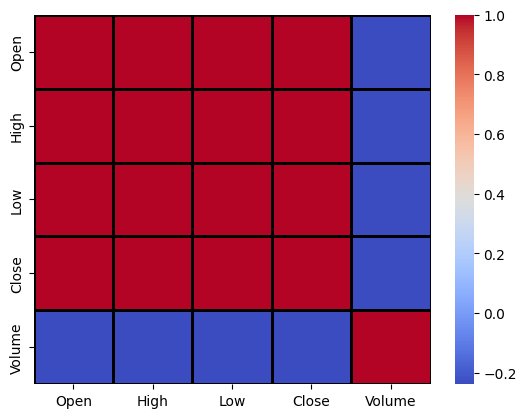

In [ ]:
import seaborn as sns

sns.heatmap(df.corr(), linecolor='black',linewidths=2, cmap = 'coolwarm')
plt.show()

Pair Plot


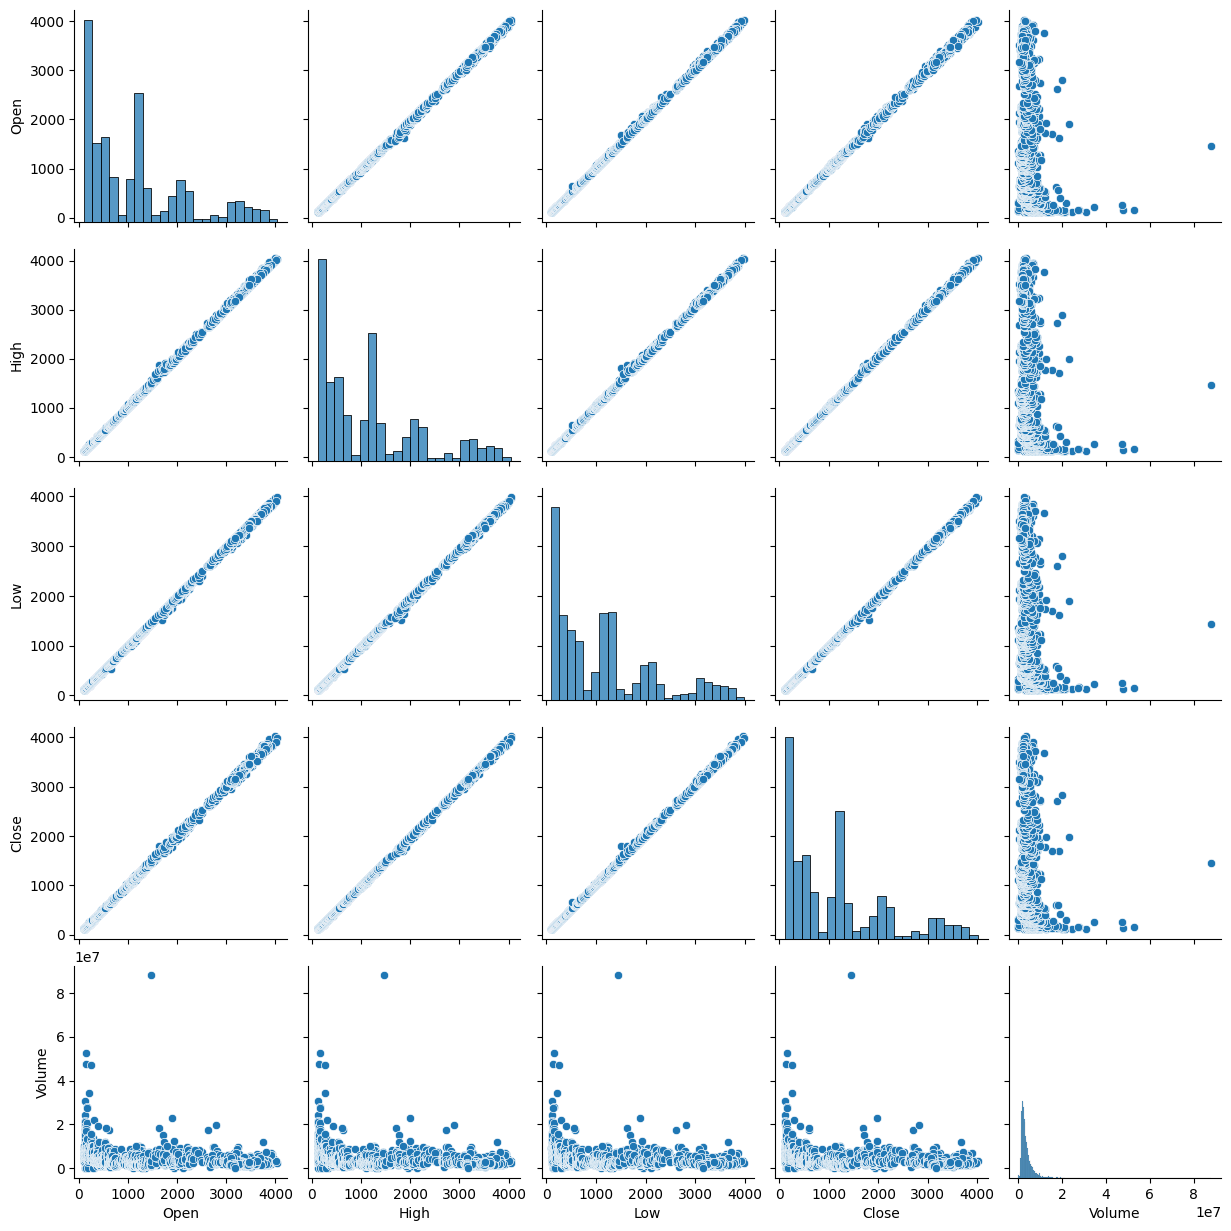

In [ ]:
sns.pairplot(df)

Text(0.5, 1.0, 'Volume of stocks over Time')

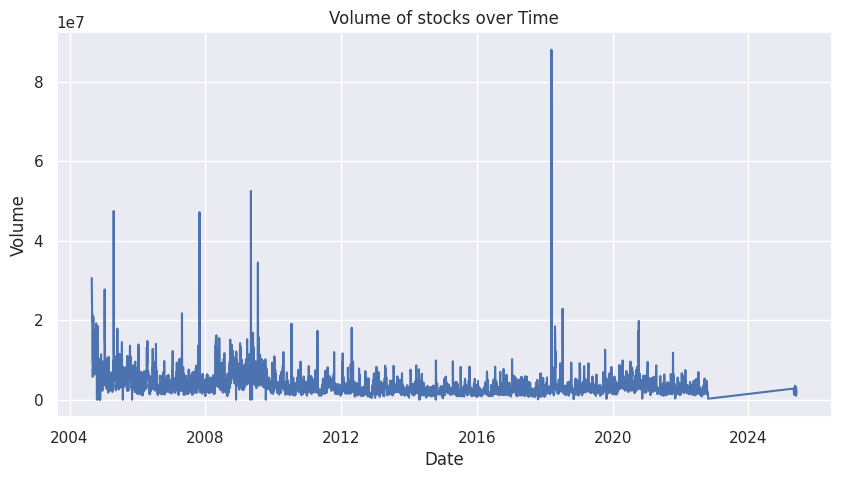

In [ ]:
#ploting a lineplot chart to see volume of stocks over time
sns.set(rc= {'figure.figsize' : (10,5)})

sns.lineplot(x=df.index, y=df['Volume'])
plt.title("Volume of stocks over Time")

<Axes: xlabel='Year'>

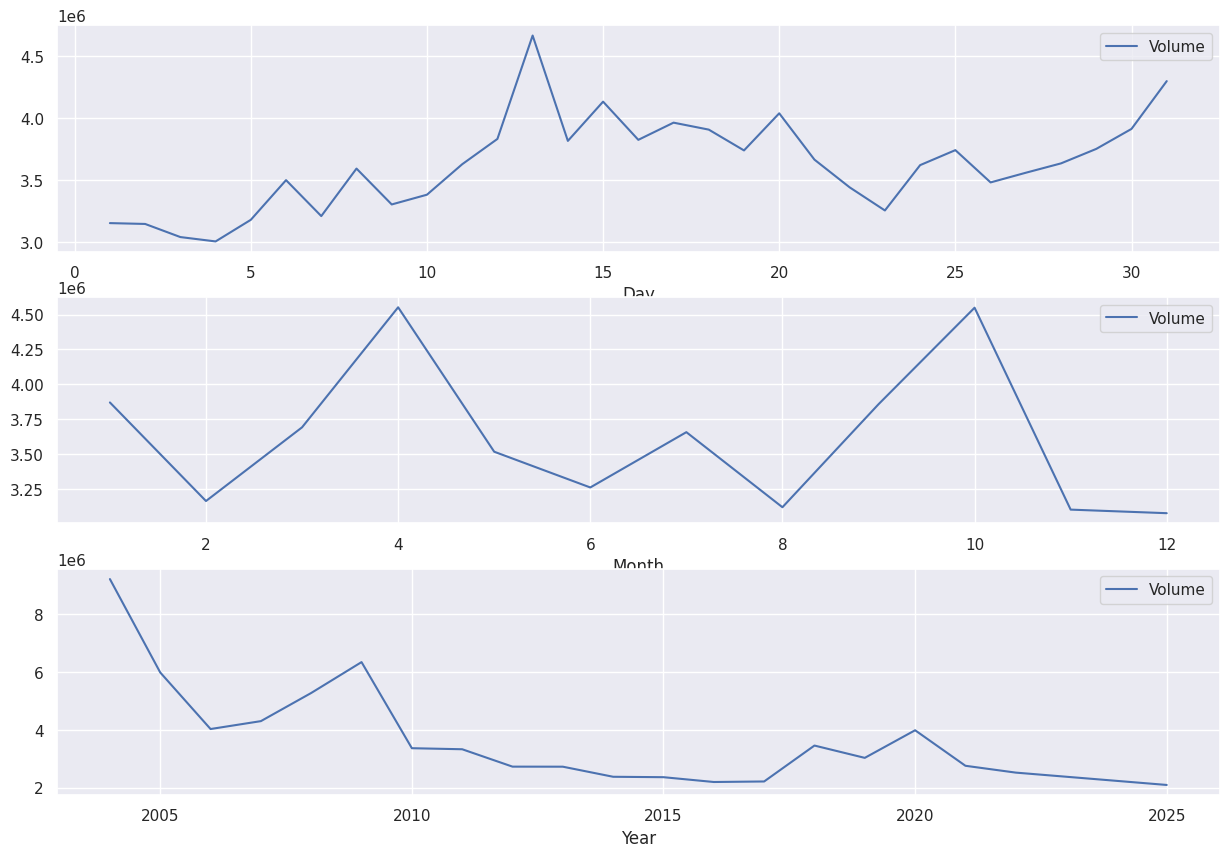

In [ ]:
# Analysis of the Volume Data on Daily, Monthly, and Yearly Basis

fig, (ax1,ax2,ax3) = plt.subplots(3, figsize = (15,10))
df.groupby(df.index.day).mean().plot(y ="Volume", ax=ax1, xlabel= "Day")
df.groupby(df.index.month).mean().plot(y ="Volume", ax=ax2, xlabel= "Month")
df.groupby(df.index.year).mean().plot(y="Volume", ax=ax3, xlabel= "Year")

<Axes: xlabel='Close', ylabel='High'>

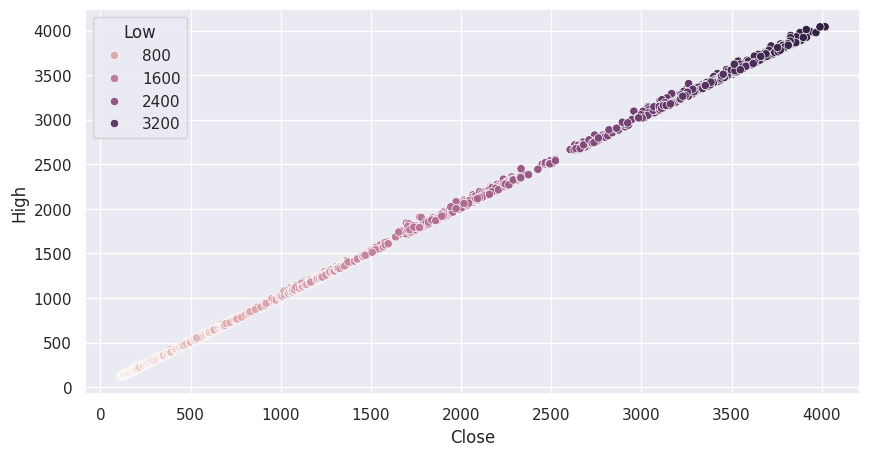

In [ ]:
#By plotting "Adj Close" against "High", we can see how the adjusted closing
# prices align with the daily high prices.

sns.scatterplot(x=df["Close"],y=df["High"],hue="Low",data=df)

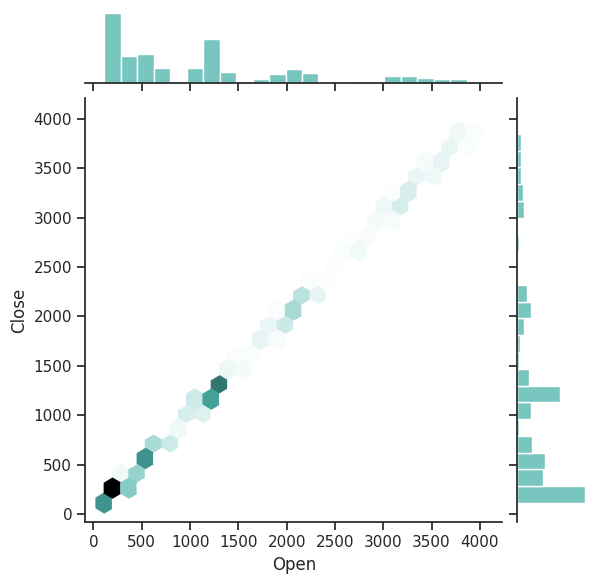

In [ ]:
#This joint plot allows us to analyze the relationship between "Open" and "Close" stock prices
sns.set_theme(style="ticks")
sns.jointplot(x=df['Open'], y=df['Close'], kind="hex", color="#4cb3ab")

<Axes: xlabel='Date', ylabel='Low'>

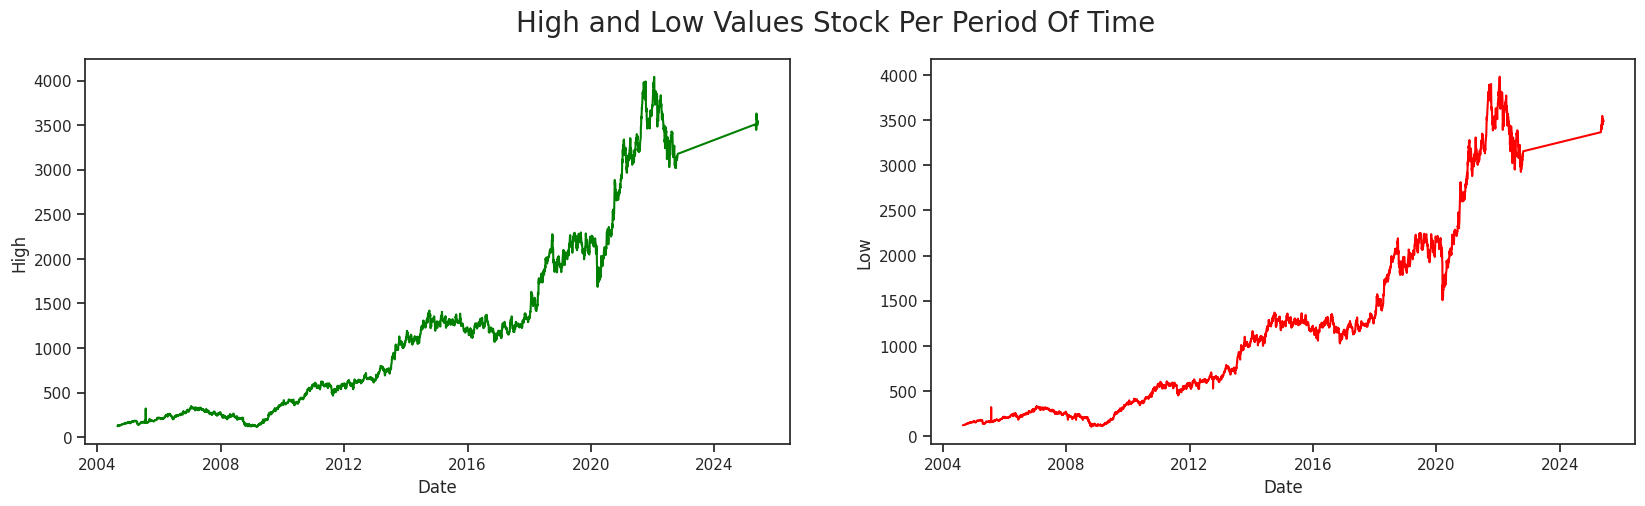

In [ ]:
#analyzing the High and low stocks over a period of time

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(20,5))
plt.suptitle('High and Low Values Stock Per Period Of Time', fontsize=20)
sns.lineplot(ax=axes[0], y=df['High'], x=df.index, color="green")
sns.lineplot(ax=axes[1], y=df['Low'], x=df.index, color="red")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
x = df.drop(['Close'], axis=1)
y = df['Close']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# %%
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
# %%
x = df.drop(['Close'], axis=1)
y = df['Close']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# %%
lr = LinearRegression()
lr.fit(x_train, y_train)
lr_predictions = lr.predict(x_test)
r2_sre = r2_score(y_test, lr_predictions)
lr_mse = mean_squared_error(y_test, lr_predictions)


print(f"Mean Squared Error of Linear regression: {lr_mse}")
print(f"R2 Score: {r2_sre}")
# %%
random_forest = RandomForestRegressor()
random_forest.fit(x_train, y_train)
rf_predictions = random_forest.predict(x_test)

rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
print(f"Mean Squared Error og random forest regressor: {rf_mse}")
print(f"R2 Score: {rf_r2}")
# %%
decision_tree = DecisionTreeRegressor()
decision_tree.fit(x_train, y_train)
dt_predictions = decision_tree.predict(x_test)
mse = mean_squared_error(y_test, dt_predictions)
r2 = r2_score(y_test, dt_predictions)
print(f"Mean Squared Error of decision tree regressor: {mse}")
print(f"R2 Score: {r2}")

lasso = Lasso()
lasso.fit(x_train, y_train)
lasso_predictions = lasso.predict(x_test)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)
print(f"Mean Squared Error of lasso regressor: {lasso_mse}")
print(f"R2 Score: {lasso_r2}")



Mean Squared Error of Linear regression: 49.85535825877377
R2 Score: 0.999949186128535
Mean Squared Error og random forest regressor: 126.59745798950007
R2 Score: 0.9998709685942946
Mean Squared Error of decision tree regressor: 156.37438183765246
R2 Score: 0.9998406191828394
Mean Squared Error of lasso regressor: 339.04177346076
R2 Score: 0.9996544398496049


In [ ]:
 # %%
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
# %%
x = df_new.drop(['Close'], axis=1)
y = df_new['Close']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# %%
lr = LinearRegression()
lr.fit(x_train, y_train)
lr_predictions = lr.predict(x_test)
r2_sre = r2_score(y_test, lr_predictions)
lr_mse = mean_squared_error(y_test, lr_predictions)


print(f"Mean Squared Error of Linear regression: {lr_mse}")
print(f"R2 Score: {r2_sre}")
# %%
random_forest = RandomForestRegressor()
random_forest.fit(x_train, y_train)
rf_predictions = random_forest.predict(x_test)

rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
print(f"Mean Squared Error og random forest regressor: {rf_mse}")
print(f"R2 Score: {rf_r2}")
# %%
decision_tree = DecisionTreeRegressor()
decision_tree.fit(x_train, y_train)
dt_predictions = decision_tree.predict(x_test)
mse = mean_squared_error(y_test, dt_predictions)
r2 = r2_score(y_test, dt_predictions)
print(f"Mean Squared Error of decision tree regressor: {mse}")
print(f"R2 Score: {r2}")

lasso = Lasso()
lasso.fit(x_train, y_train)
lasso_predictions = lasso.predict(x_test)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)
print(f"Mean Squared Error of lasso regressor: {lasso_mse}")
print(f"R2 Score: {lasso_r2}")



Mean Squared Error of Linear regression: 196.1953948225843
R2 Score: 0.7117401856798443
Mean Squared Error og random forest regressor: 151.34716079998924
R2 Score: 0.7776333919073943
Mean Squared Error of decision tree regressor: 118.94000000000165
R2 Score: 0.8252475683935211
Mean Squared Error of lasso regressor: 194.50255550634225
R2 Score: 0.7142273875196992


In [ ]:
df_new['next_day_price'] = df_new['Close'].shift(-1)
df_new.head()

,Open,High,Low,Close,Volume,next_day_price
Date,,,,,,
2025-05-29,3504.7,3532.5,3486.5,3498.1,3188072.0,3497.7
2025-05-28,3520.0,3529.0,3493.0,3497.7,1222933.0,3498.7
2025-05-27,3532.0,3540.0,3483.1,3498.7,2467680.0,3537.3
2025-05-26,3521.0,3545.0,3510.1,3537.3,967470.0,3514.6
2025-05-23,3477.0,3535.0,3465.6,3514.6,1274331.0,3477.0
